In [1]:
!pip install face_recognition

In [12]:
import os
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
import concurrent.futures
class Data:
    images=[]
    files=[]
    dimx=0
    dimy=0
    #path should not have the final / char
    def __init__(self,path=None,count=-1,dimx=160,dimy=160):
      self.dimx=dimx
      self.dimy=dimy
      if path is not None:
        files=[path+"/"+File for File in os.listdir(path)]
        #print(files[0])
        #cnt=0
        #p=Pool()
        #print(self.helper(files)[::-1])
        with concurrent.futures.ThreadPoolExecutor(max_workers=20) as exec:
          exec.map(self.load_image,files)
        #with Pool(processes=10) as pool:
        #  pool.map(self.load_image,files)
        #for File in files:
        #  p.apply_async(self.load_image,[File])
        #  if cnt==count:
        #    break
        #  self.load_image(path+"/"+File)
        #  cnt+=1
        #p.close()
        #p.join()
    def load_image(self,filepath):
      image=face_recognition.load_image_file(filepath)
      #Data.images.append(image.flatten())
      self.images.append(image.flatten())
      self.files.append(filepath)
      return len(self.images)
      #print(len(self.images))

    def get_images(self):
      return np.array(self.images)
    
    def compute_encodings(self,image):
      encodings=face_recognition.face_encodings(image.reshape((self.dimx,self.dimy,3)))
      if len(encodings)!=0:
        return np.array(encodings)
      else:
        return np.zeros((128))
    
    def get_image_encodings(self):
      imagesNP=np.array(self.images)
      print(imagesNP.shape)
      Allencodes=np.apply_along_axis(self.compute_encodings,1,imagesNP)
      return Allencodes
    
    def show_data(self,index):
      #plt.figure()
      plt.imshow(np.array(self.images[index]).reshape((self.dimx,self.dimy,3)))
    
    def check_labels(self,labels):
      plt.figure(figsize=(4,4),dpi=80)
      classify={}
      current=0
      for label in labels:
        if label not in classify.keys():
          classify[label]=[current]
        else:
          classify[label].append(current)
        current+=1
      count=1
      numOflabels=len(list(classify.keys()))
      for label in list(classify.keys())[:6]:
        for i in range(4):
          plt.subplot(6,4,count)
          self.show_data(classify[label][i])
          count+=1
facesDataset=Data("/content/drive/MyDrive/MLdatasets/detect_imgs_results")
print(len(facesDataset.images))
#def load_all_images(path):
#  files=[path+"/"+File for File in os.listdir(path)]
  #print(files[0])
#  cnt=0
#  p=Pool()
#  with Pool(processes=10) as pool:
#    val=pool.map(facesDataset.load_image,files)
#load_all_images("/content/drive/MyDrive/MLdatasets/detect_imgs_results")
#print(val)
print(len(facesDataset.images))
All_encodings=facesDataset.get_image_encodings()
#facesDataset.show_data(1)
#facesDataset.show_data(2)
#print(All_encodings[1])

12913
12913
(12913, 76800)


In [13]:
from sklearn.decomposition import PCA
pca_encode=PCA(n_components=40).fit(All_encodings).transform(All_encodings)


In [14]:
from sklearn.cluster import DBSCAN
dbscn=DBSCAN(eps=0.3)
dbscn.fit(pca_encode)
print(dbscn.labels_)

[ 0 -1 -1 ...  0 -1  0]


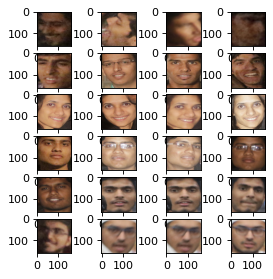

In [15]:
facesDataset.check_labels(dbscn.labels_)

In [92]:
from sklearn.metrics import silhouette_score
print(str(silhouette_score(pca_encode,dbscn.labels_)))

0.8626042737718739


In [152]:
def check_labels(labels):
      plt.figure(figsize=(4,4),dpi=80)
      classify={}
      current=0
      for label in labels:
        if label not in classify.keys():
          classify[label]=[current]
        else:
          classify[label].append(current)
        current+=1
      count=0
      #f=plt.figure()
      numOflabels=len(list(classify.keys()))
      fig, axs=plt.subplots(65,5)
      fig.set_figheight(100)
      
      print(numOflabels)
      for label in list(classify.keys())[:65]:
        for i in range(5):
          #plt.grid(False)
          axs[count,i].imshow(np.array(facesDataset.images[classify[label][i]]).reshape((160,160,3)))
        count+=1
      fig.savefig("/content/drive/MyDrive/MLdatasets/FinalResult.png")

65


<Figure size 320x320 with 0 Axes>

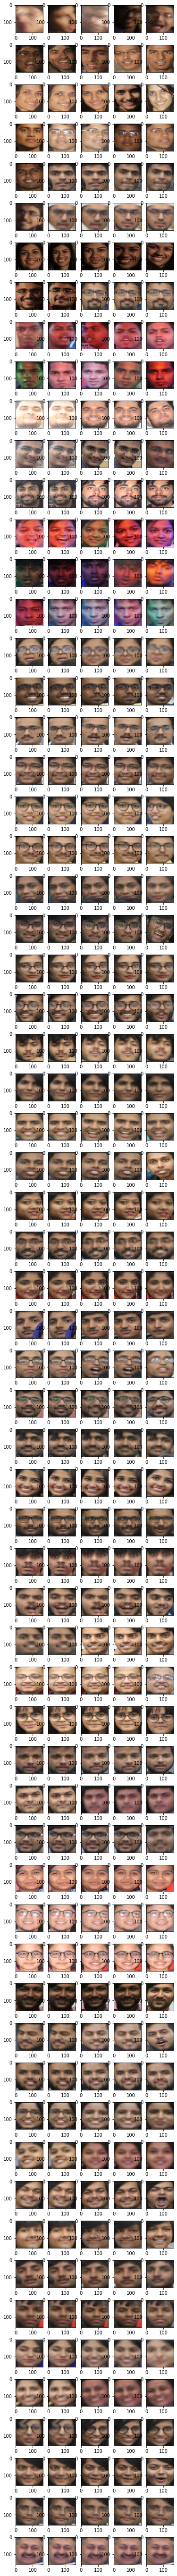

In [153]:
check_labels(dbscn.labels_)